In [2]:
import tensorflow as tf

In [3]:
def downsample(x,filters,name):
  x=tf.keras.layers.Conv2D(filters=filters,kernel_size=(2,2),padding = 'same',name = f'{name}_CONV2D')(x)
  x=tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding = 'same',name = f'{name}_MAXPOOLING2D')(x)
  x=tf.keras.layers.BatchNormalization(epsilon=1e-5, momentum=0.9,name = f'{name}_BN')(x)
  x=tf.keras.layers.Activation(activation='relu',name = f'{name}_RELU')(x)
  return x

In [4]:
def upsampling(x,resudial_x,filters,name):
  x=tf.keras.layers.Conv2D(filters=filters,kernel_size=(2,2),padding='same',name = f'{name}_CONV2D')(x)
  x=tf.keras.layers.UpSampling2D(size=(2,2),name = f'{name}_US')(x)
  x=tf.keras.layers.Add(name = f'{name}_ADD')([x,resudial_x])
  x=tf.keras.layers.BatchNormalization(epsilon=1e-5, momentum=0.9,name = f'{name}_BN')(x)
  x=tf.keras.layers.Activation(activation='relu',name = f'{name}_RELU')(x)
  return x


In [5]:
def UNet(name = 'UNet'):
  inputs=tf.keras.layers.Input(shape=(256,256,3),name = f'{name}_input')
  d1  = downsample(inputs,16,name = f'{name}_d1') #128
  d2  = downsample(d1,32,name = f'{name}_d2') #64
  d3  = downsample(d2,64,name = f'{name}_d3') #32
  d4  = downsample(d3,128,name = f'{name}_bottleneck') #16
  u3 = upsampling(d4,d3,64,name = f'{name}_u3') #32
  u2 = upsampling(u3,d2,32,name = f'{name}_u2') #64
  u1 = upsampling(u2,d1,16,name = f'{name}_u1') #128
  u0 = tf.keras.layers.UpSampling2D(size=(2,2),name = f'{name}_Upsampling')(u1)
  outputs = tf.keras.layers.Conv2D(filters=3,kernel_size=(1,1),activation = 'softmax',padding='same',name = f'{name}_outputs')(u0)
  model = tf.keras.models.Model(inputs=inputs,outputs=outputs,name=name)
  return model



In [ ]:
def UNet_complex(name = 'UNet'):
  inputs=tf.keras.layers.Input(shape=(256,256,3),name = f'{name}_input')
  d1  = downsample(inputs,32,name = f'{name}_d1')
  d2  = downsample(d1,64,name = f'{name}_d2')
  d3  = downsample(d2,128,name = f'{name}_d3')
  d4  = downsample(d3,256,name = f'{name}_bottleneck')
  u3 = upsampling(d4,d3,128,name = f'{name}_u3')
  u2 = upsampling(u3,d2,64,name = f'{name}_u2')
  u1 = upsampling(u2,d1,32,name = f'{name}_u1')
  u0 = tf.keras.layers.UpSampling2D(size=(2,2),name = f'{name}_Upsampling')(u1)
  outputs = tf.keras.layers.Conv2D(filters=3,kernel_size=(1,1),activation = 'softmax',padding='same',name = f'{name}_outputs')(u0)
  model = tf.keras.models.Model(inputs=inputs,outputs=outputs,name=name)
  return model

In [ ]:
model1=UNet_complex()

In [ ]:
model1.summary()

Model: "UNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ UNet_input          │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d1_CONV2D      │ (None, 256, 256,  │        416 │ UNet_input[0][0]  │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d1_MAXPOOLING… │ (None, 128, 128,  │          0 │ UNet_d1_CONV2D[0… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d1_BN          │ (None, 128, 128,  │        128 │ UNet_d1_MAXPOOLI… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d1_RELU        │ (None, 128, 128,  │          0 │ UNet_d1_BN[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d2_CONV2D      │ (None, 128, 128,  │      8,256 │ UNet_d1_RELU[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d2_MAXPOOLING… │ (None, 64, 64,    │          0 │ UNet_d2_CONV2D[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d2_BN          │ (None, 64, 64,    │        256 │ UNet_d2_MAXPOOLI… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d2_RELU        │ (None, 64, 64,    │          0 │ UNet_d2_BN[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d3_CONV2D      │ (None, 64, 64,    │     32,896 │ UNet_d2_RELU[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d3_MAXPOOLING… │ (None, 32, 32,    │          0 │ UNet_d3_CONV2D[0… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d3_BN          │ (None, 32, 32,    │        512 │ UNet_d3_MAXPOOLI… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d3_RELU        │ (None, 32, 32,    │          0 │ UNet_d3_BN[0][0]  │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_bottleneck_CO… │ (None, 32, 32,    │    131,328 │ UNet_d3_RELU[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_bottleneck_MA… │ (None, 16, 16,    │          0 │ UNet_bottleneck_… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_bottleneck_BN  │ (None, 16, 16,    │      1,024 │ UNet_bottleneck_… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_bottleneck_RE… │ (None, 16, 16,    │          0 │ UNet_bottleneck_

 Total params: 348,067 (1.33 MB)

 Trainable params: 346,659 (1.32 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [6]:
model = UNet()

In [7]:
model.summary()

Model: "UNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ UNet_input          │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d1_CONV2D      │ (None, 256, 256,  │        208 │ UNet_input[0][0]  │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d1_MAXPOOLING… │ (None, 128, 128,  │          0 │ UNet_d1_CONV2D[0… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d1_BN          │ (None, 128, 128,  │         64 │ UNet_d1_MAXPOOLI… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d1_RELU        │ (None, 128, 128,  │          0 │ UNet_d1_BN[0][0]  │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d2_CONV2D      │ (None, 128, 128,  │      2,080 │ UNet_d1_RELU[0][… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d2_MAXPOOLING… │ (None, 64, 64,    │          0 │ UNet_d2_CONV2D[0… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d2_BN          │ (None, 64, 64,    │        128 │ UNet_d2_MAXPOOLI… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d2_RELU        │ (None, 64, 64,    │          0 │ UNet_d2_BN[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d3_CONV2D      │ (None, 64, 64,    │      8,256 │ UNet_d2_RELU[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d3_MAXPOOLING… │ (None, 32, 32,    │          0 │ UNet_d3_CONV2D[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d3_BN          │ (None, 32, 32,    │        256 │ UNet_d3_MAXPOOLI… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d3_RELU        │ (None, 32, 32,    │          0 │ UNet_d3_BN[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_bottleneck_CO… │ (None, 32, 32,    │     32,896 │ UNet_d3_RELU[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_bottleneck_MA… │ (None, 16, 16,    │          0 │ UNet_bottleneck_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_bottleneck_BN  │ (None, 16, 16,    │        512 │ UNet_bottleneck_… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_bottleneck_RE… │ (None, 16, 16,    │          0 │ UNet_bottleneck_

 Total params: 88,019 (343.82 KB)

 Trainable params: 87,315 (341.07 KB)

 Non-trainable params: 704 (2.75 KB)

In [12]:
dummy_input = tf.random.normal([1,256,256,3])

In [13]:
model(dummy_input)

<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
array([[[[0.41129768, 0.38183078, 0.20687151],
         [0.41129768, 0.38183078, 0.20687151],
         [0.40252176, 0.39775652, 0.1997217 ],
         ...,
         [0.41363186, 0.4498476 , 0.1365205 ],
         [0.36730534, 0.34931695, 0.28337768],
         [0.36730534, 0.34931695, 0.28337768]],

        [[0.41129768, 0.38183078, 0.20687151],
         [0.41129768, 0.38183078, 0.20687151],
         [0.40252176, 0.39775652, 0.1997217 ],
         ...,
         [0.41363186, 0.4498476 , 0.1365205 ],
         [0.36730534, 0.34931695, 0.28337768],
         [0.36730534, 0.34931695, 0.28337768]],

        [[0.37073806, 0.4792823 , 0.14997965],
         [0.37073806, 0.4792823 , 0.14997965],
         [0.32283184, 0.5422119 , 0.1349562 ],
         ...,
         [0.30020323, 0.41740283, 0.28239396],
         [0.5830127 , 0.11879783, 0.29818946],
         [0.5830127 , 0.11879783, 0.29818946]],

        ...,

        [[0.40964526, 0.42494297, 

In [14]:
model.layers

[<InputLayer name=UNet_input, built=True>,
 <Conv2D name=UNet_d1_CONV2D, built=True>,
 <MaxPooling2D name=UNet_d1_MAXPOOLING2D, built=True>,
 <BatchNormalization name=UNet_d1_BN, built=True>,
 <Activation name=UNet_d1_RELU, built=True>,
 <Conv2D name=UNet_d2_CONV2D, built=True>,
 <MaxPooling2D name=UNet_d2_MAXPOOLING2D, built=True>,
 <BatchNormalization name=UNet_d2_BN, built=True>,
 <Activation name=UNet_d2_RELU, built=True>,
 <Conv2D name=UNet_d3_CONV2D, built=True>,
 <MaxPooling2D name=UNet_d3_MAXPOOLING2D, built=True>,
 <BatchNormalization name=UNet_d3_BN, built=True>,
 <Activation name=UNet_d3_RELU, built=True>,
 <Conv2D name=UNet_bottleneck_CONV2D, built=True>,
 <MaxPooling2D name=UNet_bottleneck_MAXPOOLING2D, built=True>,
 <BatchNormalization name=UNet_bottleneck_BN, built=True>,
 <Activation name=UNet_bottleneck_RELU, built=True>,
 <Conv2D name=UNet_u3_CONV2D, built=True>,
 <UpSampling2D name=UNet_u3_US, built=True>,
 <Add name=UNet_u3_ADD, built=True>,
 <BatchNormalization nam

In [18]:
model.layers[0].name
list_of_layers = []
for layer in model.layers[1:]:
  list_of_layers.append(model.get_layer(layer.name).output)

In [19]:
list_of_layers

[<KerasTensor shape=(None, 256, 256, 16), dtype=float32, sparse=False, name=keras_tensor>,
 <KerasTensor shape=(None, 128, 128, 16), dtype=float32, sparse=False, name=keras_tensor_1>,
 <KerasTensor shape=(None, 128, 128, 16), dtype=float32, sparse=False, name=keras_tensor_2>,
 <KerasTensor shape=(None, 128, 128, 16), dtype=float32, sparse=False, name=keras_tensor_3>,
 <KerasTensor shape=(None, 128, 128, 32), dtype=float32, sparse=False, name=keras_tensor_4>,
 <KerasTensor shape=(None, 64, 64, 32), dtype=float32, sparse=False, name=keras_tensor_5>,
 <KerasTensor shape=(None, 64, 64, 32), dtype=float32, sparse=False, name=keras_tensor_6>,
 <KerasTensor shape=(None, 64, 64, 32), dtype=float32, sparse=False, name=keras_tensor_7>,
 <KerasTensor shape=(None, 64, 64, 64), dtype=float32, sparse=False, name=keras_tensor_8>,
 <KerasTensor shape=(None, 32, 32, 64), dtype=float32, sparse=False, name=keras_tensor_9>,
 <KerasTensor shape=(None, 32, 32, 64), dtype=float32, sparse=False, name=keras_te

In [20]:
model_of_intermediate_layers = tf.keras.Model(inputs=model.input, outputs=list_of_layers)

In [22]:
model_of_intermediate_layers.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ UNet_input          │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d1_CONV2D      │ (None, 256, 256,  │        208 │ UNet_input[0][0]  │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d1_MAXPOOLING… │ (None, 128, 128,  │          0 │ UNet_d1_CONV2D[0… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d1_BN          │ (None, 128, 128,  │         64 │ UNet_d1_MAXPOOLI… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d1_RELU        │ (None, 128, 128,  │          0 │ UNet_d1_BN[0][0]  │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d2_CONV2D      │ (None, 128, 128,  │      2,080 │ UNet_d1_RELU[0][… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d2_MAXPOOLING… │ (None, 64, 64,    │          0 │ UNet_d2_CONV2D[0… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d2_BN          │ (None, 64, 64,    │        128 │ UNet_d2_MAXPOOLI… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d2_RELU        │ (None, 64, 64,    │          0 │ UNet_d2_BN[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d3_CONV2D      │ (None, 64, 64,    │      8,256 │ UNet_d2_RELU[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d3_MAXPOOLING… │ (None, 32, 32,    │          0 │ UNet_d3_CONV2D[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d3_BN          │ (None, 32, 32,    │        256 │ UNet_d3_MAXPOOLI… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_d3_RELU        │ (None, 32, 32,    │          0 │ UNet_d3_BN[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_bottleneck_CO… │ (None, 32, 32,    │     32,896 │ UNet_d3_RELU[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_bottleneck_MA… │ (None, 16, 16,    │          0 │ UNet_bottleneck_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_bottleneck_BN  │ (None, 16, 16,    │        512 │ UNet_bottleneck_… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ UNet_bottleneck_RE… │ (None, 16, 16,    │          0 │ UNet_bottleneck_

 Total params: 88,019 (343.82 KB)

 Trainable params: 87,315 (341.07 KB)

 Non-trainable params: 704 (2.75 KB)

In [23]:
model_of_intermediate_layers(dummy_input)

[<tf.Tensor: shape=(1, 256, 256, 16), dtype=float32, numpy=
 array([[[[ 4.6594244e-01, -2.3123209e-01,  1.0314629e+00, ...,
            9.9815363e-01, -3.0960667e-01,  1.3242103e-02],
          [ 4.9151173e-01,  6.4145941e-01, -2.1853158e-01, ...,
           -1.0475559e+00,  9.5096193e-02, -6.3752609e-01],
          [-1.1083136e+00, -7.6884037e-01,  8.3233841e-02, ...,
            2.6683307e-01, -2.4139422e-01,  6.8506849e-01],
          ...,
          [ 3.9375886e-01,  3.0227235e-01,  9.4811291e-01, ...,
           -2.4668549e-01,  5.2699322e-01, -4.7449440e-01],
          [ 6.3995922e-01,  3.0385220e-01, -2.3598021e-01, ...,
           -5.5402708e-01, -2.0393738e-01, -3.5512902e-02],
          [ 7.4085869e-02, -4.9587939e-02, -9.2099927e-02, ...,
            3.7950043e-02, -1.5441132e-01,  1.4934683e-01]],
 
         [[ 4.2347351e-01,  4.8265019e-01, -9.2369847e-02, ...,
           -4.7632161e-01,  7.2108519e-01, -6.3569999e-01],
          [-1.3369171e-01, -7.8738672e-01, -1.3097575e

#Reading Data

#Model Training

In [ ]:
intermediate_model = tf.keras.Model(
    inputs=model.input,
    outputs=model.get_layer('UNet_d2_CONV2D').output
)

In [ ]:
intermediate_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ UNet_input (InputLayer)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ UNet_d1_CONV2D (Conv2D)         │ (None, 256, 256, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ UNet_d1_MAXPOOLING2D            │ (None, 128, 128, 16)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ UNet_d1_BN (BatchNormalization) │ (None, 128, 128, 16)   │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ UNet_d1_RELU (Activation)       │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ UNet_d2_CONV2D (Conv2D)         │ (None, 128, 128, 32)   │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,352 (9.19 KB)

 Trainable params: 2,320 (9.06 KB)

 Non-trainable params: 32 (128.00 B)

In [ ]:
intermediate_pred = intermediate_model(batch[:1])

In [ ]:
intermediate_pred

<tf.Tensor: shape=(1, 128, 128, 32), dtype=float32, numpy=
array([[[[-0.50051564, -0.10937171,  0.1158612 , ..., -0.19265713,
          -0.19360138,  0.41079044],
         [-0.50051564, -0.10937171,  0.1158612 , ..., -0.19265713,
          -0.19360138,  0.41079044],
         [-0.50051564, -0.10937171,  0.1158612 , ..., -0.19265713,
          -0.19360138,  0.41079044],
         ...,
         [-0.50051564, -0.10937171,  0.1158612 , ..., -0.19265713,
          -0.19360138,  0.41079044],
         [-0.50051564, -0.10937171,  0.1158612 , ..., -0.19265713,
          -0.19360138,  0.41079044],
         [ 0.11221671,  0.33217353,  0.14726625, ..., -0.15611921,
          -0.16901465,  0.5819323 ]],

        [[-0.50051564, -0.10937171,  0.1158612 , ..., -0.19265713,
          -0.19360138,  0.41079044],
         [-0.50051564, -0.10937171,  0.1158612 , ..., -0.19265713,
          -0.19360138,  0.41079044],
         [-0.50051564, -0.10937171,  0.1158612 , ..., -0.19265713,
          -0.19360138,  0.

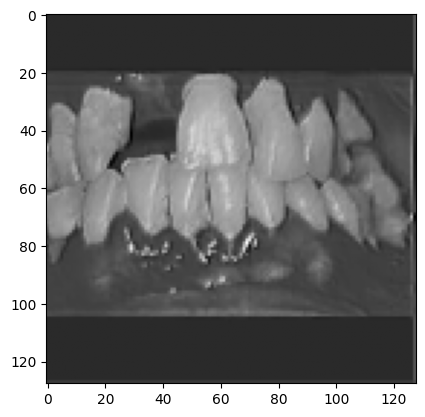

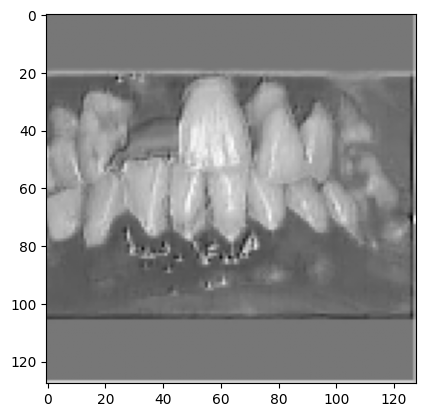

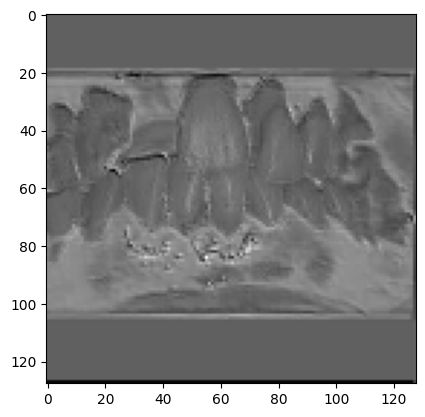

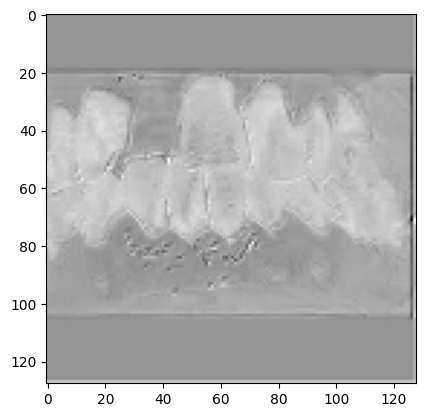

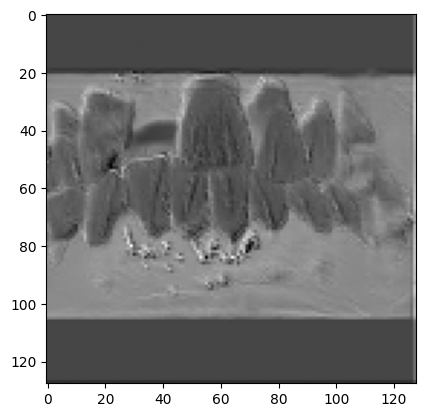

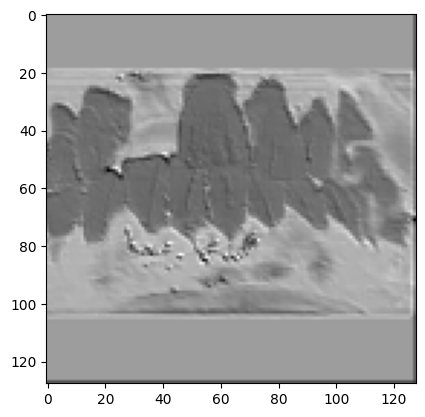

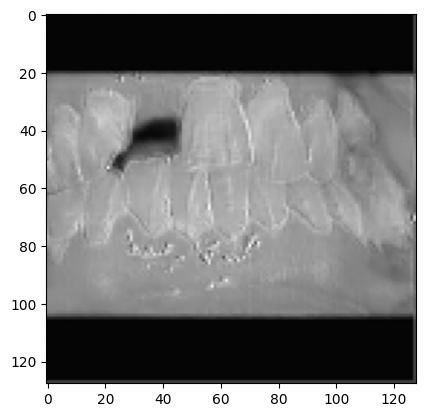

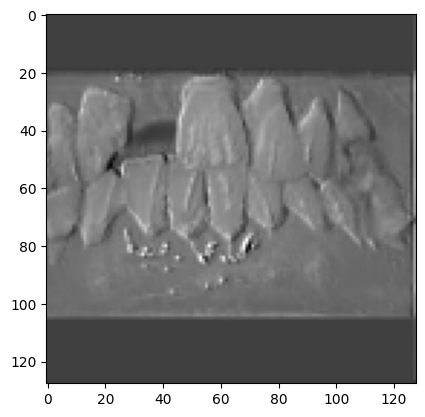

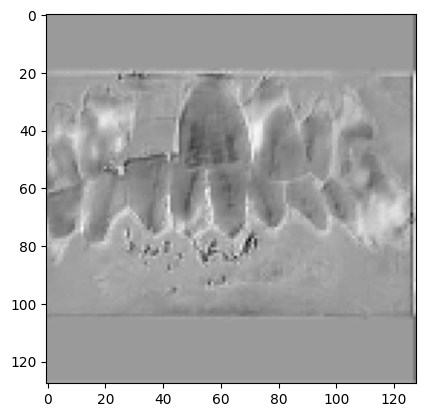

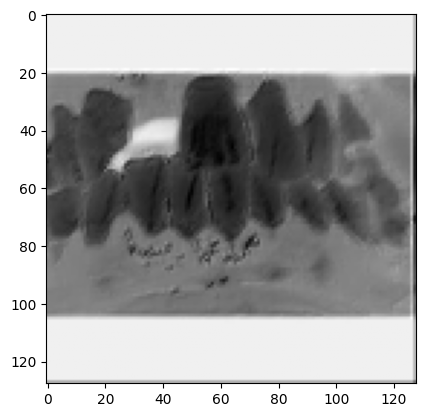

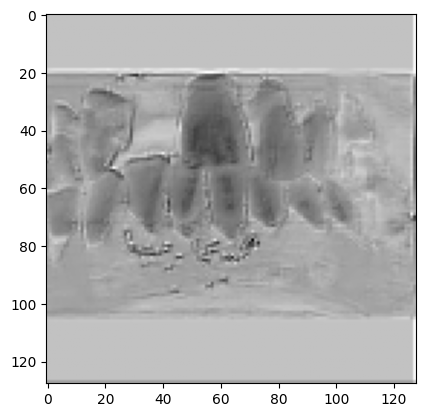

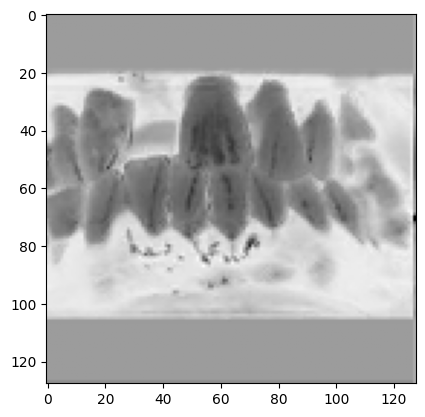

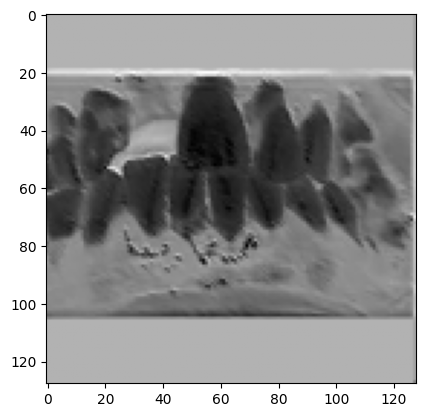

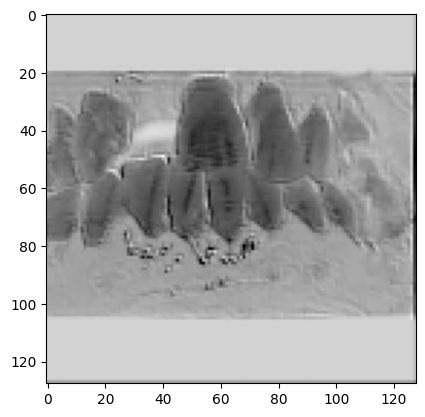

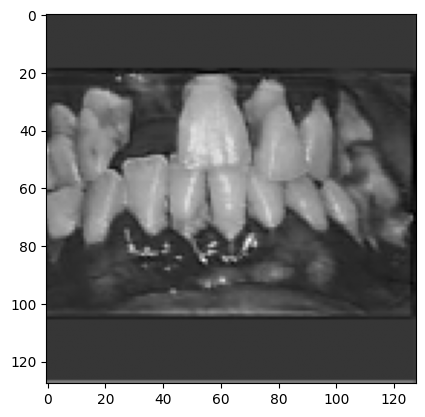

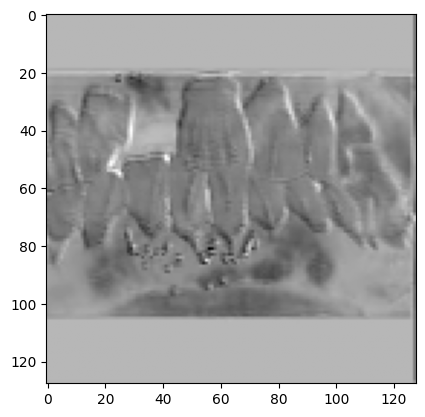

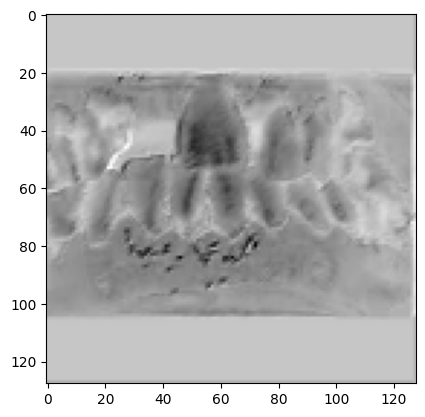

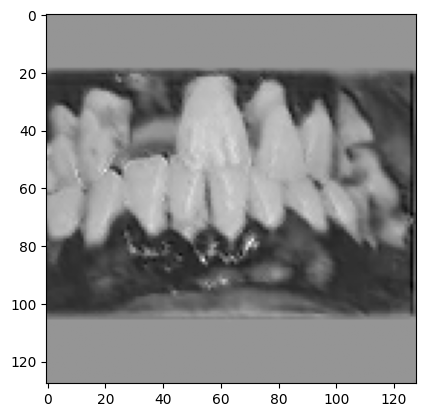

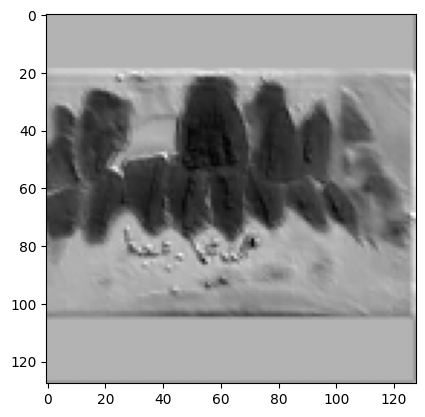

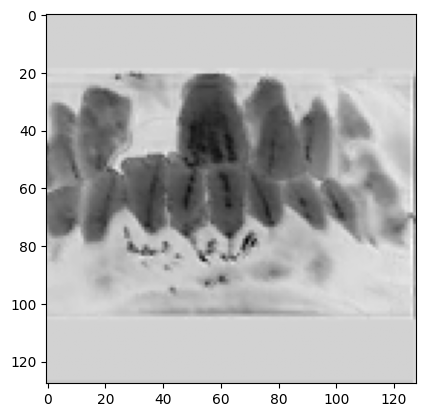

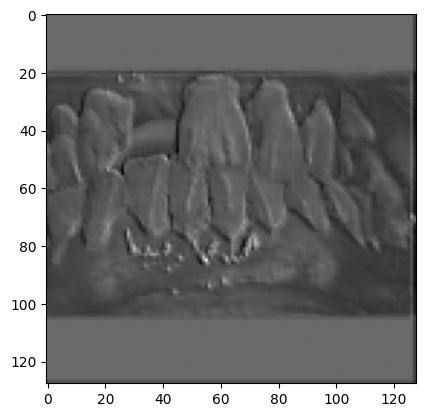

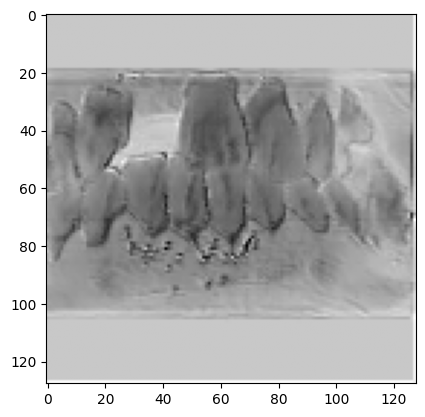

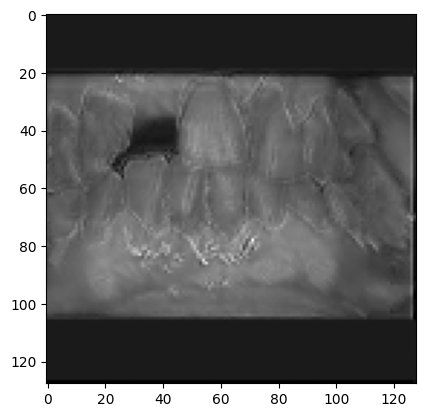

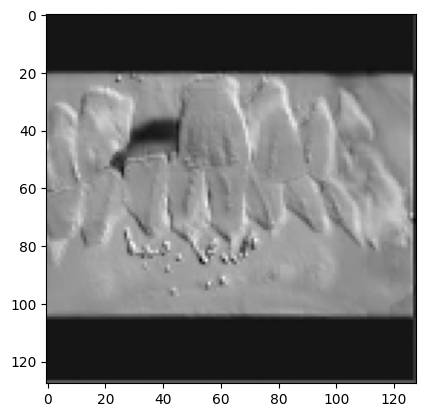

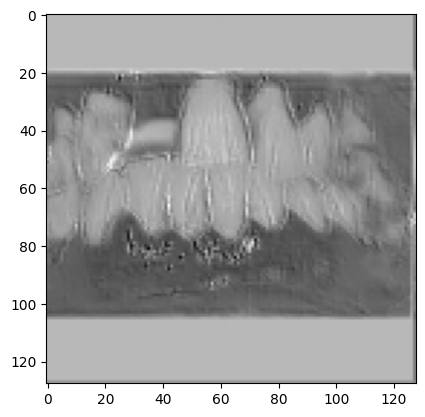

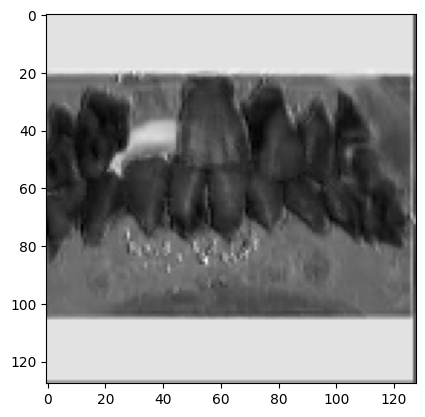

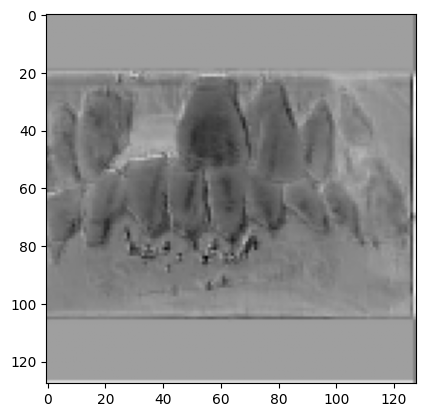

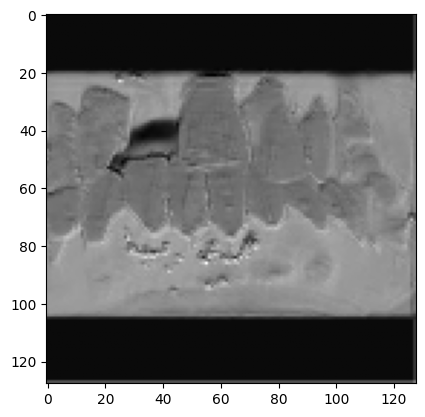

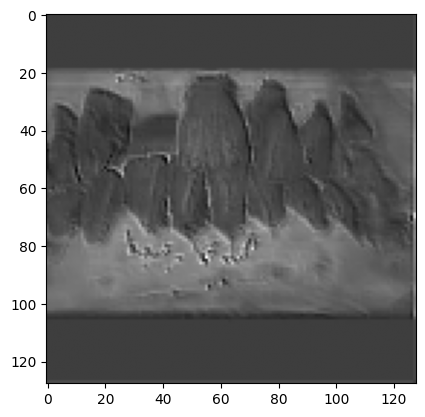

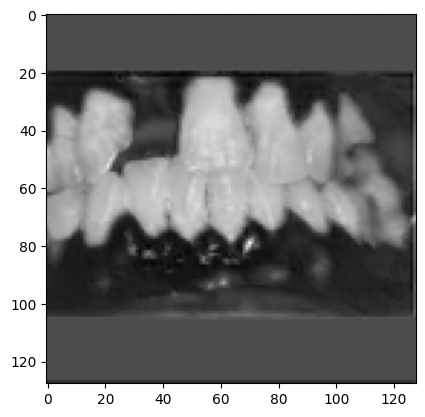

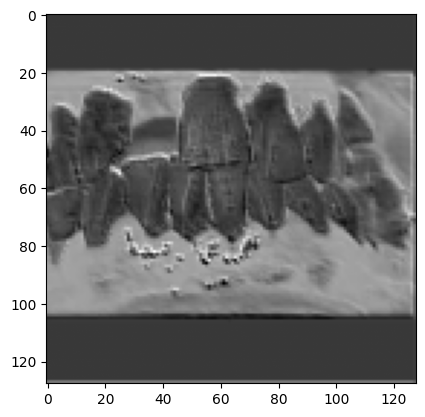

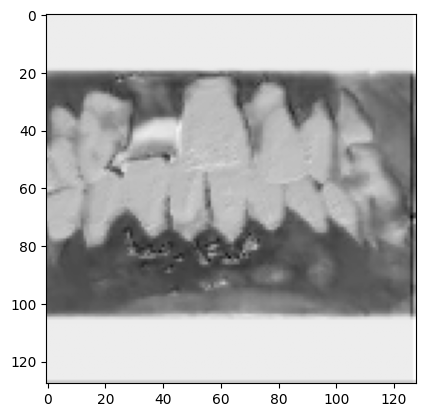

In [ ]:
for i in range(intermediate_pred.shape[-1]):
    plt.imshow(intermediate_pred[0,:,:,i],cmap='grey')
    plt.show()

In [ ]:
model.save("my_model.h5")